In [296]:
#profitableHospital-project

In [297]:
#dependencies
import pandas as pd

import requests
import json
from config import gkey

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import tensorflow
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import joblib

In [298]:
#initial file read
df = pd.read_csv("Medicare_Hospital_Cost_Report_PUF_2017.csv")
#df = df.dropna(axis='columns', how='all')
#df = df.dropna()
df.head()

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (105) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,County,Medicare CBSA Number,Rural Versus Urban,CCN Facility Type,...,Total Other Income,Total Income,Total Other Expenses,Net Income,Cost To Charge Ratio,Net Revenue from Medicaid,Medicaid Charges,Net Revenue from Stand-Alone SCHIP,Stand-Alone SCHIP Charges,rpt_rec_num
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,MARSHALL,48540.0,U,STH,...,4492364.0,2638799.0,NaN,2638799.0,0.453498,1237912.0,4026663.0,NaN,NaN,599181
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,RICHMOND,99934.0,R,STH,...,31174.0,-1114660.0,NaN,-1114660.0,0.173114,391215.0,4981119.0,NaN,NaN,601095
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,PECOS,99945.0,R,STH,...,2096862.0,576278.0,NaN,576278.0,0.455741,719760.0,1275211.0,NaN,NaN,601392
3,341317,PIONEER HLTH SERV OF STOKES CNTY,1570 NC & 89 HWY,DANBURY,NC,27016,STOKES,49180.0,U,CAH,...,1542201.0,640268.0,622592.0,17676.0,1.154767,578366.0,801800.0,159516.0,702117.0,601721
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,WARE,99911.0,R,STH,...,224757.0,-6170184.0,NaN,-6170184.0,0.271734,3113423.0,11231324.0,1331.0,8211.0,603846


In [299]:
conTable = pd.read_csv("certificateofneedstatesTable.csv")
conTable.head()

,State Code,CON
0,AK,1
1,AL,1
2,AR,1
3,AZ,0
4,CA,0


In [300]:
urbanTable = pd.read_csv("ruralversusurbanTable.csv")
urbanTable.head()

,Rural Versus Urban,Urban
0,U,1
1,R,2


In [301]:
#Append certificate of need indicator
mainFile1 = pd.merge(df, conTable, how= "left", on=['State Code'])
#mainFile1.head()

In [302]:
#Append a numeric representation of rural v. urban
mainFile2 = pd.merge(mainFile1, urbanTable, how= "left", on=['Rural Versus Urban'])
#mainFile2.head()

In [303]:
#Append lattitude and longitude using google maps api

In [304]:
#Append calculated field inpatient percent
inpatient = mainFile2["Inpatient Revenue"]/mainFile2["Gross Revenue"]
mainFile2["Inpatient %"] = inpatient
#mainFile2.head()

In [305]:
#Append calculated field outpatient percent
outpatient = mainFile2["Outpatient Revenue"]/mainFile2["Gross Revenue"]
mainFile2["Outpatient %"] = outpatient
#mainFile2.head()

In [306]:
#Append calculated field charity percent
charity = mainFile2["Cost of Charity Care"]/mainFile2["Net Patient Revenue"]
mainFile2["Charity %"] = charity
#mainFile2.head()

In [307]:
#Is there a way to replace blank lines with 0?

In [308]:
#Append calculated field uncompensated percent
uncompensated = mainFile2["Cost of Uncompensated Care"]/mainFile2["Net Patient Revenue"]
mainFile2["Uncompensated %"] = charity
#mainFile2.head()

In [309]:
#Is there a way to replace blank lines with 0?

In [310]:
#Append calculated field revenue per discharge
revdischarge = mainFile2["Net Patient Revenue"]/mainFile2["Total Discharges (V + XVIII + XIX + Unknown)"]
mainFile2["Rev Per Discharge"] = revdischarge
#mainFile2.head()

In [311]:
#Append calculated field revenue per bed
revbed = mainFile2["Net Patient Revenue"]/mainFile2["Number of Beds"]
mainFile2["Rev Per Bed"] = revbed
#mainFile2.head()

In [312]:
#Append calculated field revenue per bed day
revbed = mainFile2["Net Patient Revenue"]/mainFile2["Total Bed Days Available"]
mainFile2["Rev Per Bed Days"] = revbed
#mainFile2.head()

In [313]:
#Append calculated field revs per fte
revfte = mainFile2["Net Patient Revenue"]/mainFile2["FTE - Employees on Payroll"]
mainFile2["Rev Per FTE"] = revfte
#mainFile2.head()

In [314]:
#Append calculated field discharges per bed
volbed = mainFile2["Total Discharges (V + XVIII + XIX + Unknown)"]/mainFile2["Number of Beds"]
mainFile2["Discharges Per Bed"] = volbed
#mainFile2.head()

In [315]:
#Append calculated field discharges per bed day
voldays = mainFile2["Total Discharges (V + XVIII + XIX + Unknown)"]/mainFile2["Total Bed Days Available"]
mainFile2["Discharges Per Bed Days"] = voldays
#mainFile2.head()

In [316]:
#Append calculated field discharges per bed
volfte = mainFile2["Total Discharges (V + XVIII + XIX + Unknown)"]/mainFile2["FTE - Employees on Payroll"]
mainFile2["Discharges Per FTE"] = volbed
#mainFile2.head()

In [317]:
#labor percent
wagepercent = mainFile2["Wage-Related Costs (Core)"] + mainFile2["Total Salaries (adjusted)"]
wagepercent = wagepercent / mainFile2["Net Patient Revenue"]
#wagepercent.head()

In [318]:
#Overhead percent
overheadpercent = mainFile2["Overhead Non-Salary Costs"] / mainFile2["Net Patient Revenue"]
#overheadpercent.head()

In [319]:
#Depreciation percent
deprpercent = mainFile2["Depreciation Cost"] / mainFile2["Net Patient Revenue"]
#overheadpercent.head()

In [320]:
#Append calculated field net income percent to file
profit = mainFile2["Net Income"]/mainFile2["Net Patient Revenue"]
mainFile2["Net Income %"] = profit
#mainFile2.head()

In [321]:
netinc = mainFile2["Net Income %"]
netinc.head()

0    0.308395
1   -0.337043
2    0.232354
3    0.002665
4   -0.132444
Name: Net Income %, dtype: float64

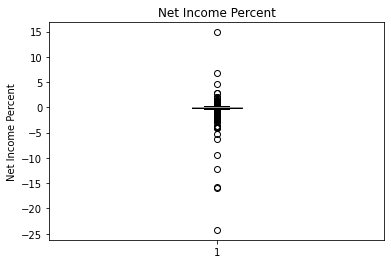

In [322]:
#chartdata = mainFile2['Net Income %']
netinc2 = netinc.dropna(how='any')
chartdata = netinc2
fig1, ax1 = plt.subplots()
ax1.set_title('Net Income Percent')
ax1.set_ylabel('Net Income Percent')
ax1.boxplot(chartdata)
plt.show()

In [323]:
#Quartile calculations
quartiles = chartdata.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of profit percent is: {lowerq}")
print(f"The upper quartile of profit percent is: {upperq}")
print(f"The interquartile range of profit percent is: {iqr}")
print(f"The the median of profit percent is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of profit percent is: -0.030653238847723918
The upper quartile of profit percent is: 0.11379730445563284
The interquartile range of profit percent is: 0.14445054330335677
The the median of profit percent is: 0.0380451602645128 
Values below -0.24732905380275907 could be outliers.
Values above 0.330473119410668 could be outliers.


In [324]:
bins = [-100, -0.03065, 0.11379, 100]
group_names = ["3", "2", "1"]

In [325]:
mainFile2["Net Income Score"] = pd.cut(mainFile2["Net Income %"], bins, labels=group_names, include_lowest=True)
#mainFile2.head()

In [326]:
mainFile2['Net Income Score'].value_counts()

2    2945
1    1473
3    1473
Name: Net Income Score, dtype: int64

In [327]:
#Targets dataset on Colorad0
#mainFile3 = mainFile2.loc[df['State Code'] == 'CO']

In [328]:
#Targets dataset on STH locations
mainFile4 = mainFile2.loc[df['CCN Facility Type'] == 'STH']

In [329]:
mainFile4.to_csv("mainCO2017.csv", index=False, header=True)

In [330]:
#Targeting the dataset on metrics important to Kent
targetFile5 = mainFile4[['Provider CCN','Hospital Name','Street Address','City','State Code','Zip Code','CON','Urban','Inpatient %','Outpatient %','Charity %','Uncompensated %','Rev Per Discharge','Rev Per Bed','Rev Per Bed Days','Rev Per FTE','Discharges Per Bed','Discharges Per Bed Days','Discharges Per FTE','Net Income %', 'Net Income Score']
]
targetFile5.head()


,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,CON,Urban,Inpatient %,Outpatient %,...,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE,Net Income %,Net Income Score
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,1.0,1.0,0.311881,0.688119,...,0.003080,19670.239080,122236.485714,1328.657453,26564.899100,6.214286,0.067547,6.214286,0.308395,1
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,1.0,2.0,0.325730,0.674270,...,0.001075,16873.362245,51674.671875,847.125768,121408.920705,3.062500,0.050205,3.062500,-0.337043,3
2,450178,PECOS COUNTY MEMORIAL HOSPITAL,386 W IH-10,FORT STOCKTON,TX,79735,0.0,2.0,0.240965,0.759035,...,NaN,23847.836538,99207.000000,1837.166667,16626.499966,4.160000,0.077037,4.160000,0.232354,1
4,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,1.0,2.0,0.391293,0.608707,...,0.016794,22079.254976,300562.761290,2504.689677,50452.385233,13.612903,0.113441,13.612903,-0.132444,3
5,250025,GILMORE MEMORIAL REGIONAL MEDICAL CE,1105 EARL FRYE BLVD,AMORY,MS,38821,1.0,2.0,0.364763,0.635237,...,0.000905,15444.529412,132660.378947,1105.503158,52406.586826,8.589474,0.071579,8.589474,-0.132426,3


In [331]:
# Identify incomplete rows
targetFile5.count()

Provider CCN               3397
Hospital Name              3397
Street Address             3394
City                       3397
State Code                 3397
Zip Code                   3397
CON                        3394
Urban                      3388
Inpatient %                3298
Outpatient %               3287
Charity %                  3060
Uncompensated %            3060
Rev Per Discharge          3293
Rev Per Bed                3300
Rev Per Bed Days           3299
Rev Per FTE                3293
Discharges Per Bed         3376
Discharges Per Bed Days    3376
Discharges Per FTE         3376
Net Income %               3303
Net Income Score           3303
dtype: int64

In [332]:
targetFile5 = targetFile5.dropna(how='any')

In [333]:
# Identify incomplete rows
targetFile5.count()

Provider CCN               3034
Hospital Name              3034
Street Address             3034
City                       3034
State Code                 3034
Zip Code                   3034
CON                        3034
Urban                      3034
Inpatient %                3034
Outpatient %               3034
Charity %                  3034
Uncompensated %            3034
Rev Per Discharge          3034
Rev Per Bed                3034
Rev Per Bed Days           3034
Rev Per FTE                3034
Discharges Per Bed         3034
Discharges Per Bed Days    3034
Discharges Per FTE         3034
Net Income %               3034
Net Income Score           3034
dtype: int64

In [334]:
#Output targeted file
targetFile5.to_csv("targetedCO2017.csv", index=False, header=True)

In [335]:
# Select features to be used as x values
features1 = targetFile5[['CON','Urban','Inpatient %','Outpatient %','Charity %','Uncompensated %','Rev Per Discharge','Rev Per Bed','Rev Per Bed Days','Rev Per FTE','Discharges Per Bed','Discharges Per Bed Days','Discharges Per FTE']
]
features1.head()

,CON,Urban,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE
0,1.0,1.0,0.311881,0.688119,0.003080,0.003080,19670.239080,122236.485714,1328.657453,26564.899100,6.214286,0.067547,6.214286
1,1.0,2.0,0.325730,0.674270,0.001075,0.001075,16873.362245,51674.671875,847.125768,121408.920705,3.062500,0.050205,3.062500
4,1.0,2.0,0.391293,0.608707,0.016794,0.016794,22079.254976,300562.761290,2504.689677,50452.385233,13.612903,0.113441,13.612903
5,1.0,2.0,0.364763,0.635237,0.000905,0.000905,15444.529412,132660.378947,1105.503158,52406.586826,8.589474,0.071579,8.589474
6,1.0,2.0,0.276917,0.723083,0.000780,0.000780,29768.443038,383952.163265,3199.601361,49737.365833,12.897959,0.107483,12.897959


In [336]:
#Output features file as a reference document
features1.to_csv("featuresCO2017.csv", index=False, header=True)

In [337]:
# Identify the outcome column/data
y = targetFile5[['Net Income Score']]
y.head()

,Net Income Score
0,1
1,3
4,3
5,3
6,3


In [338]:
y.describe()

,Net Income Score
count,3034
unique,3
top,2
freq,1592


In [339]:
y.shape

(3034, 1)

In [340]:
X = features1
X.shape

(3034, 13)

In [341]:
#Create a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [342]:
y_train.shape

(2275, 1)

In [343]:
X_train.shape

(2275, 13)

In [344]:
y_test.shape

(759, 1)

In [345]:
X_test.shape

(759, 13)

In [346]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [347]:
#Identify features to create a more efficient model with
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [348]:
selector.support_

array([False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True])

In [349]:
selector.ranking_

array([ 9, 10, 11,  8,  2,  1,  6,  1,  4,  7,  5,  3,  1])

In [350]:
#Create the linear regression model and fit to the training data
modela = LinearRegression()
modela.fit(X_train_scaled, y_train)
score = modela.score(X_train_scaled, y_train)
print(f"Training Data Score: {modela.score(X_train_scaled, y_train)}")

Training Data Score: 0.1098600455428771


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [351]:
#Run the model with the testing data and determine score
print(f"Testing Data Score: {modela.score(X_test_scaled, y_test)}")

Testing Data Score: 0.1084875938869293


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
